In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_tflops(csv_path, device_query_csv_path="/home/abhishek/A100-benchmarks/device_info.csv"):
    # Load benchmark data
    df = pd.read_csv(csv_path)

    # Load device info
    dev_info = pd.read_csv(device_query_csv_path)
    theoretical_tflops = dev_info["theoretical_tflops"].iloc[0]
    device_name = dev_info["name"].iloc[0]

    print(f"Using device: {device_name}")
    print(f"Theoretical FP32 peak: {theoretical_tflops:.1f} TFLOPs")

    seq_lens = sorted(df["seq_len"].unique())
    num_heads = sorted(df["num_heads"].unique())

    plt.style.use("seaborn-v0_8-whitegrid")
    fig, axes = plt.subplots(
        1, len(seq_lens), figsize=(6 * len(seq_lens), 5), sharey=True
    )
    if len(seq_lens) == 1:
        axes = [axes]

    for ax, seq_len in zip(axes, seq_lens):
        subset = df[df["seq_len"] == seq_len]
        for h in num_heads:
            group = subset[subset["num_heads"] == h].sort_values("head_dim")
            ax.plot(group["head_dim"], group["tflops"], marker="o", label=f"heads={h}")

        ax.axhline(
            y=theoretical_tflops, color="r", linestyle="--", label="Theoretical Peak"
        )
        ax.set_title(f"Sequence Length = {seq_len}")
        ax.set_xlabel("Head Dimension")
        ax.set_xscale("log", base=2)
        ax.set_ylabel("TFLOPs/s")
        ax.legend()

    plt.suptitle(f"Attention TFLOPs vs Head Dim ({device_name})", fontsize=14)
    plt.tight_layout()
    plt.show()

    return df.sort_values("tflops", ascending=False).head(10)

### Vanilla Custom Batched and Strided GEMM

Using device: NVIDIA A100-SXM-64GB
Theoretical FP32 peak: 22.1 TFLOPs


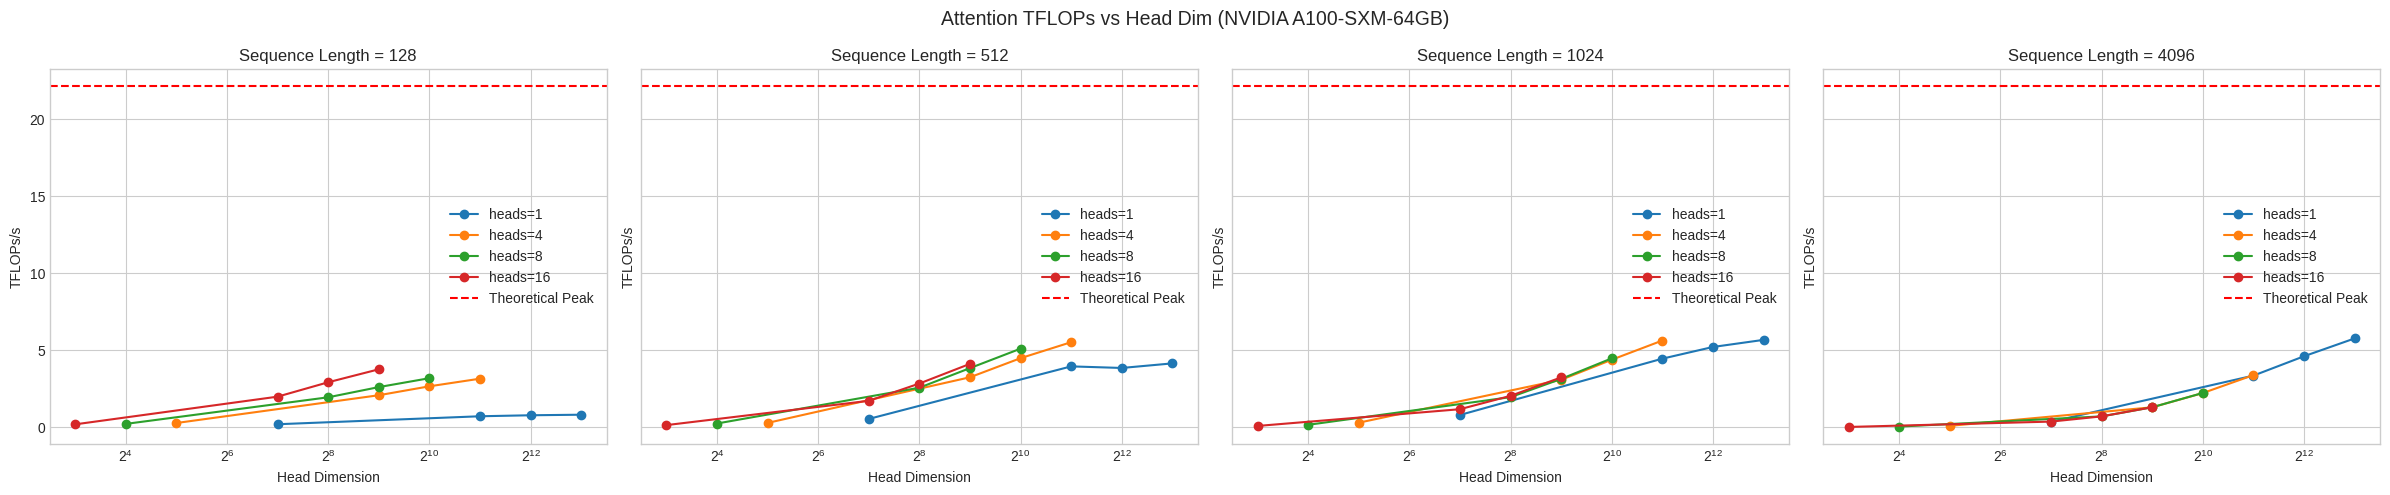

,batch_size,num_heads,seq_len,head_dim,avg_time_ms,tflops
15,1,1,4096,8192,95.170600,5.77671
11,1,1,1024,8192,6.047740,5.68055
27,1,4,1024,2048,6.095460,5.63762
23,1,4,512,2048,1.552790,5.53125
10,1,1,1024,4096,3.291340,5.21940
39,1,8,512,1024,1.681410,5.11002
14,1,1,4096,4096,59.511400,4.61948
22,1,4,512,1024,0.956211,4.49275
43,1,8,1024,1024,7.671810,4.48089
9,1,1,1024,2048,1.926140,4.46020


In [2]:
plot_tflops("/home/abhishek/A100-benchmarks/vanilla_NVIDIA_A100_SXM_64GB_sm80.csv")

### Vanilla V2 Custom Batched and Strided GEMM

Using device: NVIDIA A100-SXM-64GB
Theoretical FP32 peak: 22.1 TFLOPs


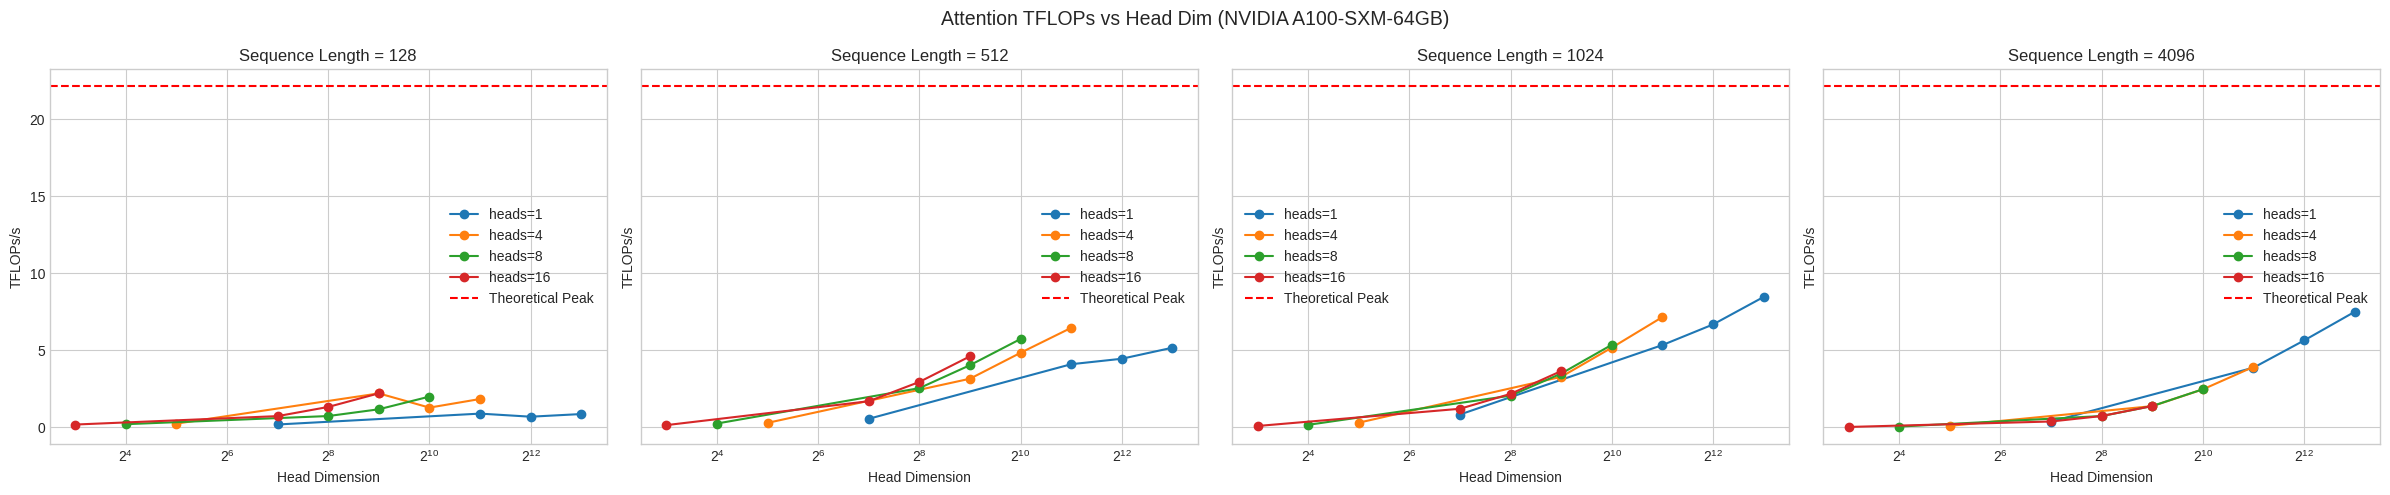

,batch_size,num_heads,seq_len,head_dim,avg_time_ms,tflops
11,1,1,1024,8192,4.05893,8.46393
15,1,1,4096,8192,73.27150,7.50323
27,1,4,1024,2048,4.79990,7.15931
10,1,1,1024,4096,2.57188,6.67948
23,1,4,512,2048,1.32915,6.46193
39,1,8,512,1024,1.49729,5.73838
14,1,1,4096,4096,48.71090,5.64374
43,1,8,1024,1024,6.41434,5.35933
9,1,1,1024,2048,1.60829,5.34167
26,1,4,1024,1024,3.32267,5.17302


In [3]:
plot_tflops("/home/abhishek/A100-benchmarks/vanilla_v2_NVIDIA_A100_SXM_64GB_sm80.csv")

### cuBLAS batched and strided GEMM

Using device: NVIDIA A100-SXM-64GB
Theoretical FP32 peak: 22.1 TFLOPs


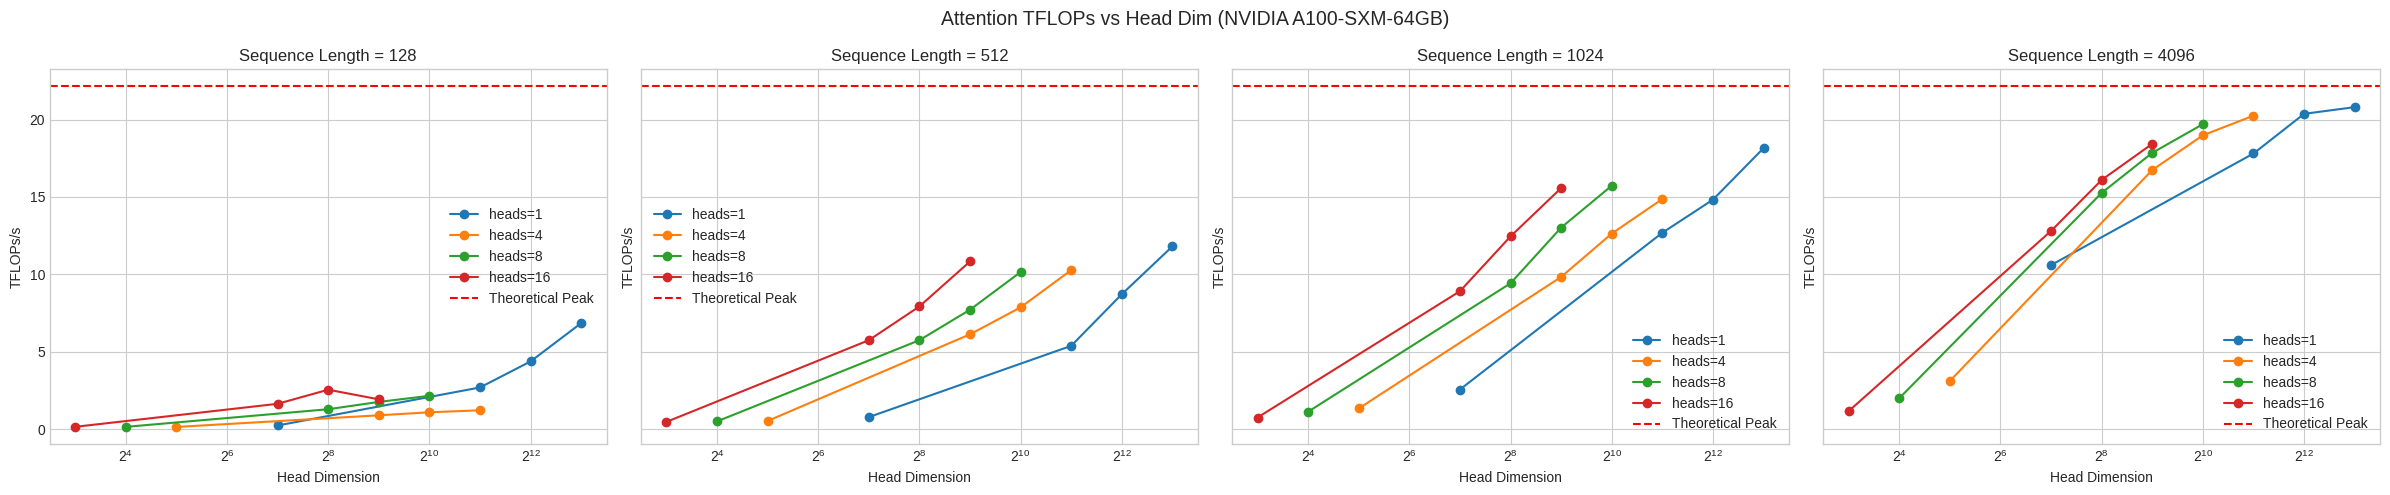

,batch_size,num_heads,seq_len,head_dim,avg_time_ms,tflops
15,1,1,4096,8192,26.43110,20.8002
14,1,1,4096,4096,13.49860,20.3660
31,1,4,4096,2048,27.16020,20.2474
47,1,8,4096,1024,27.92450,19.7005
30,1,4,4096,1024,14.49190,18.9805
63,1,16,4096,512,29.86910,18.4314
11,1,1,1024,8192,1.89276,18.1505
46,1,8,4096,512,15.42230,17.8485
13,1,1,4096,2048,7.72157,17.8048
29,1,4,4096,512,8.22129,16.7409


In [4]:
plot_tflops("/home/abhishek/A100-benchmarks/vanilla_cublas_NVIDIA_A100_SXM_64GB_sm80.csv")